Лабораторна робота №2

Моделювання лінійних систем

Скоробагатько Максим

ФБ-31мн



In [16]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sympy as sm
from sympy import *

За допомогою функцій tf2zpk пакету Signal processing знайти вираз для передатної функції в zpk-формі( шляхом задання нулів, полюсів та коефіцієнту підсилення). Зробити висновок щодо стійкості системи.

In [17]:
numerator = np.array([1, -1, 0, 1])
denominator = np.array([1, 0, 1, 4])

z, p, k = sc.signal.tf2zpk(numerator, denominator)

print('z: ', z)
print('p: ', p)
print('k: ', k)

z:  [ 0.87743883+0.74486177j  0.87743883-0.74486177j -0.75487767+0.j        ]
p:  [ 0.68939835+1.55750129j  0.68939835-1.55750129j -1.3787967 +0.j        ]
k:  1.0


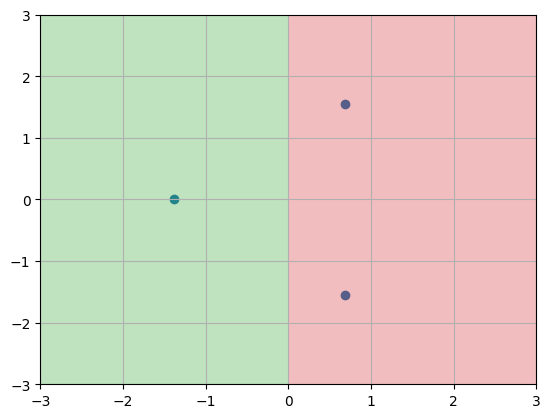

Система стабільна


In [18]:
Im = []
Re = []
for z in p:
    Im.append(z.imag)
    Re.append(z.real)
fig, axs = plt.subplots()
axs.scatter(Re, Im)
axs.grid(True)
axs.set_xlim(-3, 3)
axs.set_ylim(-3, 3)
plt.axvspan(-3, 0, facecolor='#2ca02c', alpha=0.3)
plt.axvspan(0, 3, facecolor='#d62728', alpha=0.3)
plt.show()
if (all(Re) > 0):
    print('Система стабільна')
else:
    print('Система нестабільна')

Імпульсна характеристика

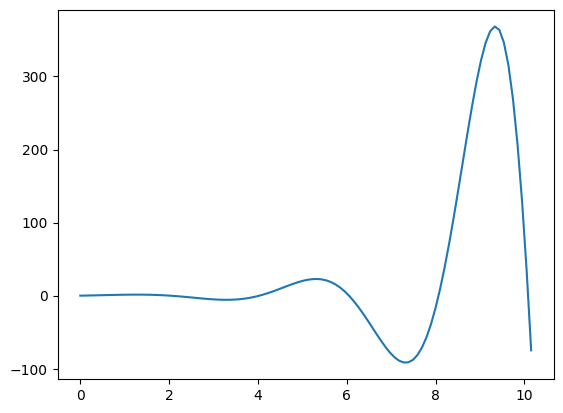

In [19]:
t, y_impulse = sc.signal.impulse(sc.signal.ZerosPolesGain(z, p, k))
plt.plot(t, y_impulse)
plt.show()

Перехадна функція

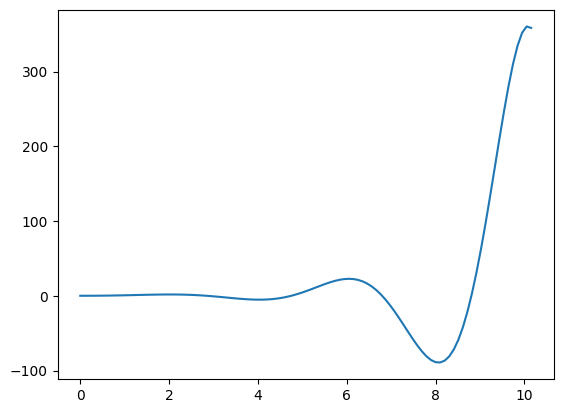

In [20]:
t,y_step = sc.signal.step(sc.signal.ZerosPolesGain(z, p, k))
plt.plot(t,y_step)
plt.show()

Дослідити відгук системи на гармонічний вхідний сигнал, знайти відповідні коефіцієнт посилення та зсув фази.

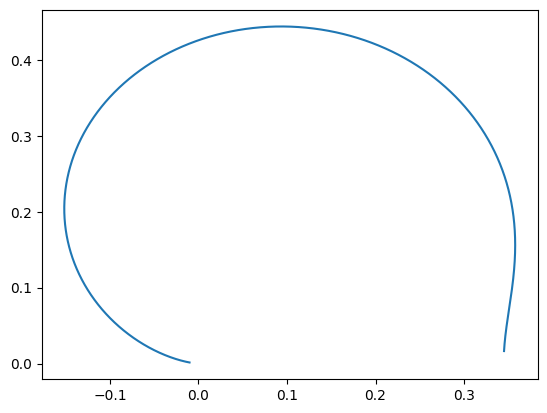

Коефіцієнти підсилення: 


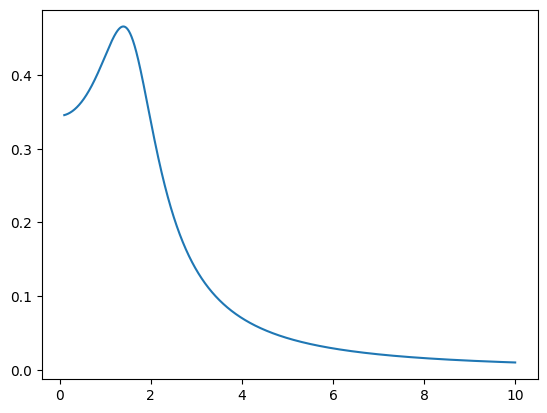

Зсув фази: 


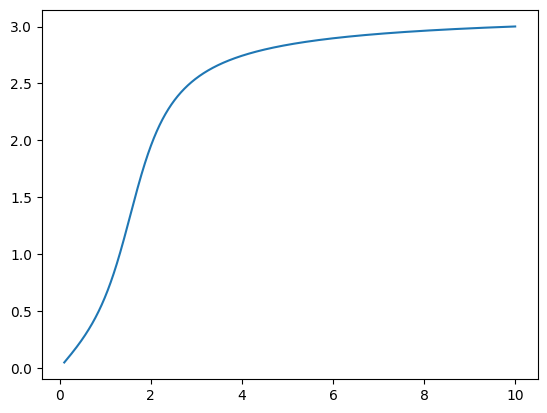

In [21]:
w, H = sc.signal.freqresp(sc.signal.ZerosPolesGain(z, p, k))
plt.plot(H.real,H.imag)
plt.show()
gain = np.abs(H)
print('Коефіцієнти підсилення: ')
plt.plot(w, gain)
plt.show()
phase = np.angle(H)
print('Зсув фази: ')
plt.plot(w, phase)
plt.show()

Побудувати модель системи, що відповідає канонічним формам керованості та спостережуваності.

In [22]:
A_c, B_c, C_c, D_c = sc.signal.zpk2ss(z, p, k)
print('Канонічна форма керованості: ')
print('A:', A_c)
print('B:', B_c)
print('C:', C_c)
print('D:', D_c)

Канонічна форма керованості: 
A: [[-2.22044605e-16 -1.00000000e+00 -4.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]]
B: [[1.]
 [0.]
 [0.]]
C: [[0.        1.        1.3787967]]
D: [[0.]]


In [23]:
A_observe = A_c.T
B_observe = C_c.reshape((3,1))
C_observe = B_c.reshape((1,3))
D_observe = D_c
print('Канонічна форма спостережуваності: ')
print('A: \n', A_observe)
print('B: \n', B_observe)
print('C: \n', C_observe)
print('D: \n', D_observe)

Канонічна форма спостережуваності: 
A: 
 [[-2.22044605e-16  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-4.00000000e+00  0.00000000e+00  0.00000000e+00]]
B: 
 [[0.       ]
 [1.       ]
 [1.3787967]]
C: 
 [[1. 0. 0.]]
D: 
 [[0.]]


Переконаємося порівнянням результатів відображення вхід-вихід, що вони ідентичні початковій.

In [24]:
num_control, den_control = sc.signal.ss2tf(A_c, B_c, C_c, D_c)
num_observe, den_observe = sc.signal.ss2tf(A_observe,B_observe,C_observe,D_observe)
print('Передатна функція для канонічної форми керованості: ',num_control, den_control)
print('Передатна функція для канонічної форми спостережуваності: ',num_observe, den_observe)

if (num_control.all() == num_observe.all())&(den_control.all() == den_observe.all()) :
    print ("Сигнали ідентичні")
else:
    print ("Сигнали не ідентичні")

Передатна функція для канонічної форми керованості:  [[ 0.00000000e+00 -2.22044605e-15  1.00000000e+00  1.37879670e+00]] [1.00000000e+00 2.66453526e-15 1.00000000e+00 4.00000000e+00]
Передатна функція для канонічної форми спостережуваності:  [[ 0.00000000e+00 -6.66133815e-16  1.00000000e+00  1.37879670e+00]] [1. 0. 1. 4.]
Сигнали не ідентичні


Знайдемо різницю реакцій на імпульс і сходинку.

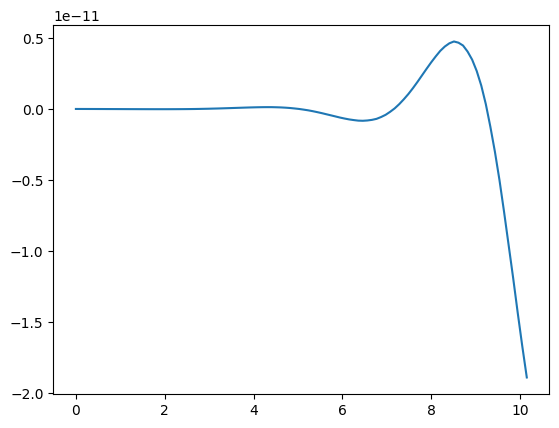

In [25]:
t, y_impulse_control = sc.signal.impulse(sc.signal.TransferFunction(num_control, den_control))
plt.plot(t, y_impulse - y_impulse_control)
plt.show()

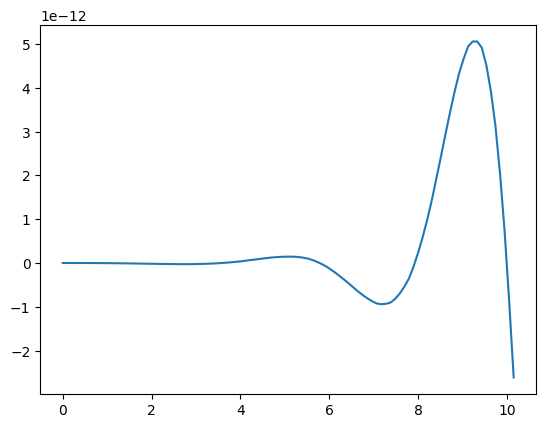

In [26]:
t, y_step_control = sc.signal.step(sc.signal.TransferFunction(num_control, den_control))
plt.plot(t, y_step - y_step_control)
plt.show()

Ця різниця реакцій на імпульс і сходинку зумовлена похибкою при переходах від однієї моделі до іншої.